# Using NumPy for statistics and algebra

In [58]:
import numpy as np

In [59]:
# array vs arange!

arr = np.array([1, 2, 3, 4, 5, 6])
ran = np.arange(1, 7)

print(arr)
print(ran)
print(type(arr))
print(type(ran))


[1 2 3 4 5 6]
[1 2 3 4 5 6]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [60]:
# lets slice it!

print("select elements by index", arr[0]) # -> Como en una lista
print("slice elemtne of the array:", arr[1:5]) # ->  2, 3, 4, 5, 6 # incluye el indice 1 hasta el 5 sin incluir!
print("ending point of the array:", arr[4:])  # del indice 4 hasta el fina. El indice 4 es el 5
print("ending point of the array:", arr[:4]) # del principio hasta el indice 4 sin incluir por tanto 1,2,3,4

select elements by index 1
slice elemtne of the array: [2 3 4 5]
ending point of the array: [5 6]
ending point of the array: [1 2 3 4]


In [61]:
# lets combine 'em!

arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])
arr = np.concatenate((arr1, arr2))
print("concatenar: ",arr)

arr_sum = arr1 + arr2
print("sumar:", arr_sum)

concatenar:  [1 2 3 4 5 6]
sumar: [5 7 9]


**Stack method**

In [62]:
arr = np.stack((arr1, arr2), axis=1)
print(arr)

[[1 4]
 [2 5]
 [3 6]]


In [63]:
arr = np.stack((arr1, arr2), axis=0)
print(arr)

[[1 2 3]
 [4 5 6]]


**mean**

In [64]:
np.mean(arr,axis=1)


array([2., 5.])

In [65]:
np.mean(arr,axis=0)


array([2.5, 3.5, 4.5])

# Storing and manipulating data with pandas


In [66]:
import pandas as pd

d = {
    "coll": [1, 5, 8, 2],
    "coll2": [3,3,7,4]
}

df = pd.DataFrame(data=d)

df

,coll,coll2
0,1,3
1,5,3
2,8,7
3,2,4


**groupby**

In [67]:
df = pd.DataFrame(
    {"Animal": ["Dog", "Dog", "Rat", "Rat", "Rat"],
     "Max_Speed": [380., 770., 24.,26.,25.],
    "Max Weight":[10.,8.1,.1,.12,.09]}
    
)
df.head(1)

,Animal,Max_Speed,Max Weight
0,Dog,380.0,10.0


In [68]:
df.groupby(["Animal"]).mean()

,Max_Speed,Max Weight
Animal,,
Dog,575.0,9.050000
Rat,25.0,0.103333


In [69]:
df.groupby(["Animal"]).agg({"mean", "count"})

Max_Speed        Max Weight          
           count   mean      count      mean
Animal                                      
Dog            2  575.0          2  9.050000
Rat            3   25.0          3  0.103333

In [70]:
df.groupby("Animal").agg({"Max_Speed": ["mean", "count"], "Max Weight":"sum"})

Max_Speed       Max Weight
            mean count        sum
Animal                           
Dog        575.0     2      18.10
Rat         25.0     3       0.31

**value_counts()**

In [71]:
df

,Animal,Max_Speed,Max Weight
0,Dog,380.0,10.00
1,Dog,770.0,8.10
2,Rat,24.0,0.10
3,Rat,26.0,0.12
4,Rat,25.0,0.09


In [72]:
df.value_counts()

Animal  Max_Speed  Max Weight
Dog     380.0      10.00         1
        770.0      8.10          1
Rat     24.0       0.10          1
        25.0       0.09          1
        26.0       0.12          1
Name: count, dtype: int64

**aggregate()**

In [73]:
df.agg("mean", axis="rows",numeric_only=True)


Max_Speed     245.000
Max Weight      3.682
dtype: float64

In [74]:
df.agg("sum", axis=0, numeric_only=True)

Max_Speed     1225.00
Max Weight      18.41
dtype: float64

In [75]:
df.agg({'Max_Speed' : ['sum', 'min'], 'Max Weight' : ['mean', 'max']})

,Max_Speed,Max Weight
sum,1225.0,NaN
min,24.0,NaN
mean,NaN,3.682
max,NaN,10.000


**quantile()**

In [76]:
df[["Max_Speed", "Max Weight"]]

,Max_Speed,Max Weight
0,380.0,10.00
1,770.0,8.10
2,24.0,0.10
3,26.0,0.12
4,25.0,0.09


In [77]:
df[["Max_Speed", "Max Weight"]].quantile(0.5)

Max_Speed     26.00
Max Weight     0.12
Name: 0.5, dtype: float64

**pivot()**

In [78]:
df = pd.DataFrame(
{'type': ['one', 'one', 'one', 'two', 'two',  'two'],
 'cat': ['A', 'B', 'C', 'A', 'B', 'C'],
'val': [1, 2, 3, 4, 5, 6],
'letter': ['x', 'y', 'z', 'q', 'w', 't']})
df.pivot(index='type', columns='cat', values='val')

cat,A,B,C
type,,,
one,1,2,3
two,4,5,6


**pivot_table()**

# Visualizing patterns with Seaborn

<Axes: xlabel='total_bill', ylabel='tip'>

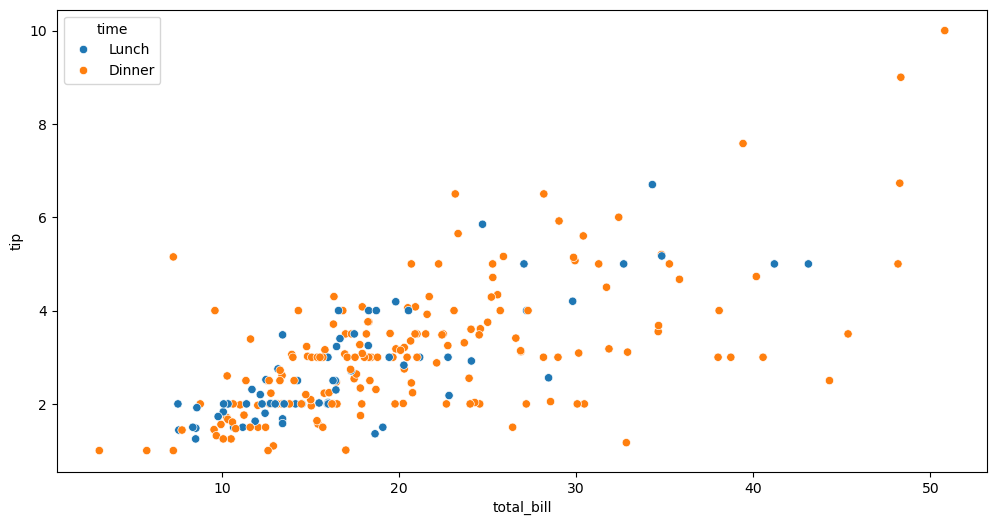

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")

f, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")

In [80]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


**style**

<Axes: xlabel='total_bill', ylabel='tip'>

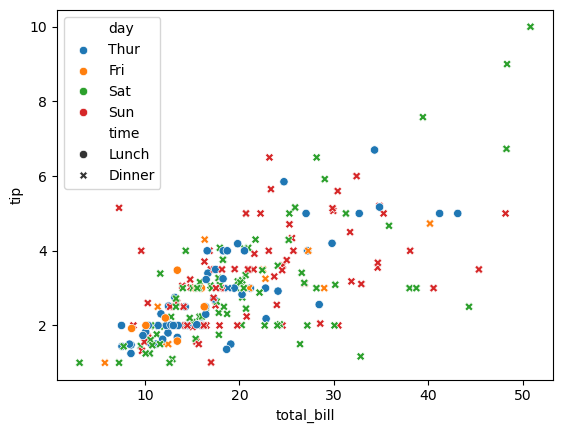

In [81]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day", style="time")

**size**

<Axes: xlabel='total_bill', ylabel='tip'>

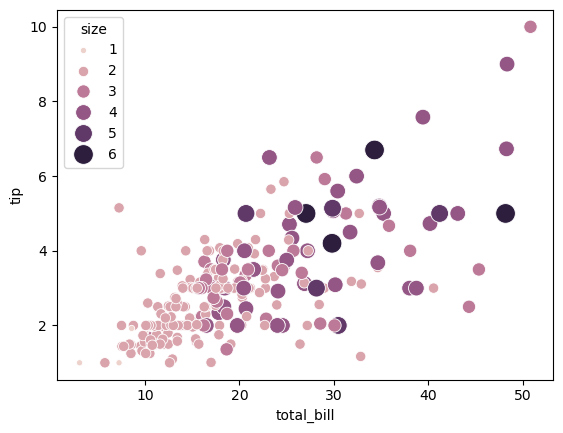

In [82]:
sns.scatterplot(
    data=tips, x="total_bill", y="tip", hue="size", 
    size="size", sizes=(20, 200), legend="full"
)

**lineplot**

<Axes: xlabel='Dates', ylabel='Count'>

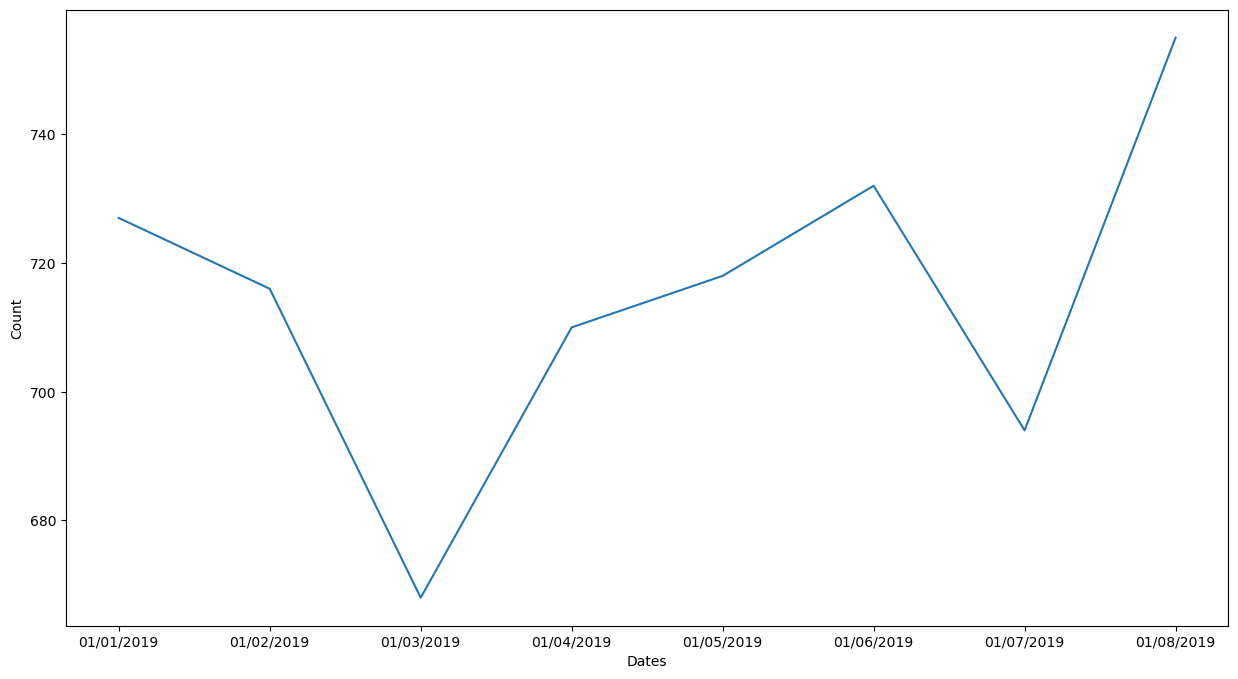

In [83]:
df = pd.DataFrame({"Dates":
['01/01/2019','01/02/2019','01/03/2019','01/04/2019',
'01/05/2019','01/06/2019','01/07/2019','01/08/2019'],
"Count": [727,716,668,710,718,732,694,755]})
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Dates', y = 'Count',data = df)

In [84]:
fmri = sns.load_dataset("fmri")

In [86]:
fmri.head(10)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
5,s9,18,stim,parietal,-0.103513
6,s8,18,stim,parietal,-0.064408
7,s7,18,stim,parietal,-0.060526
8,s6,18,stim,parietal,-0.007029
9,s5,18,stim,parietal,-0.040557


<Axes: xlabel='timepoint', ylabel='signal'>

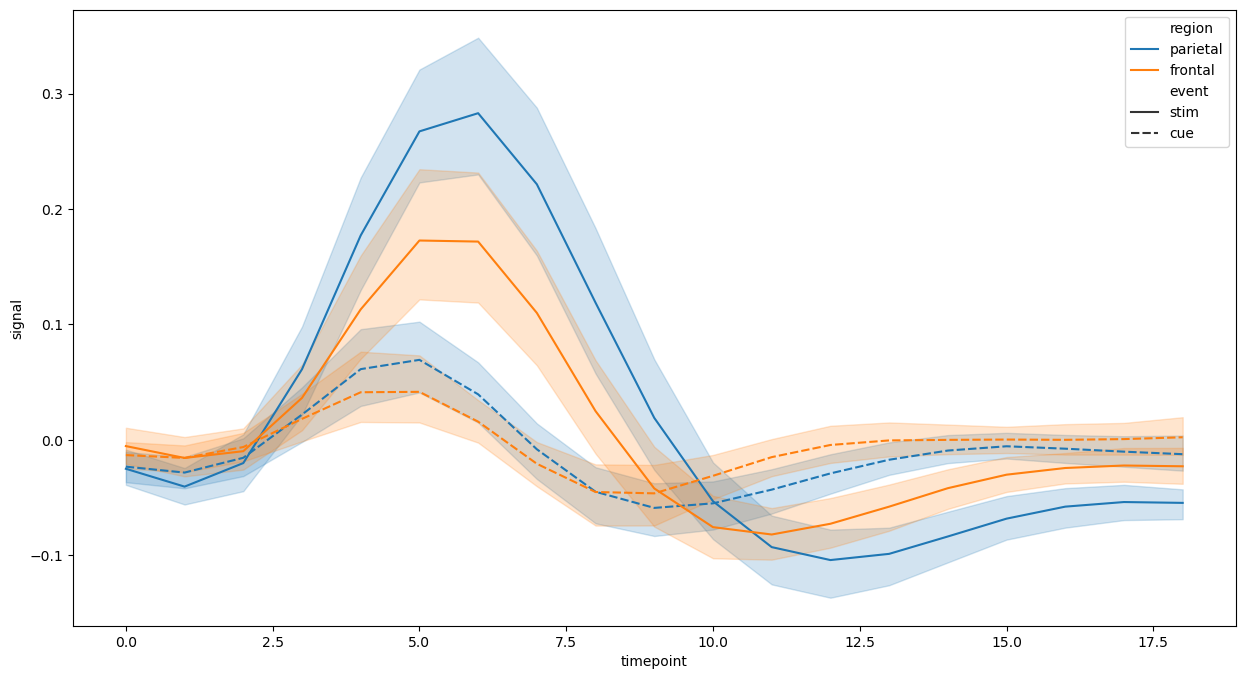

In [85]:
f, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(x="timepoint", y="signal", hue="region", style="event",data=fmri)

**barplot**

/var/folders/42/tg009yd16fd7lk4bbyt3hzth0000gn/T/ipykernel_46431/965241225.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0.9)` for the same effect.

  ax = sns.barplot(x="day", y="total_bill", data=tips,ci=.9)


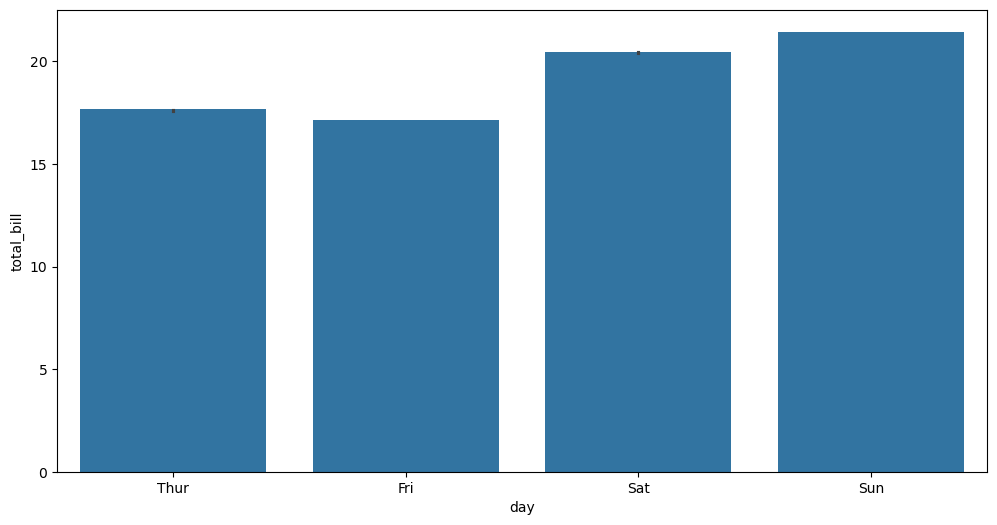

In [87]:
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x="day", y="total_bill", data=tips,ci=.9)

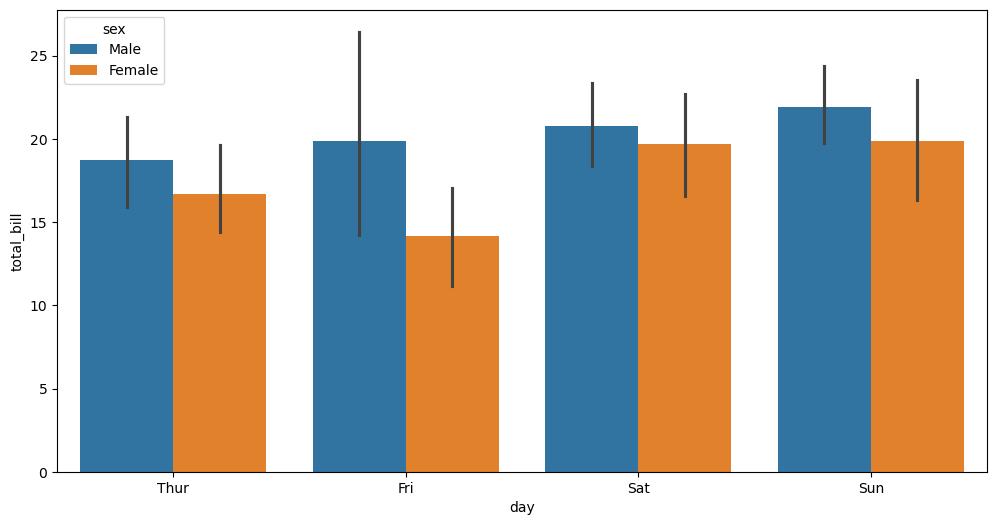

In [88]:
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)


**catplot**

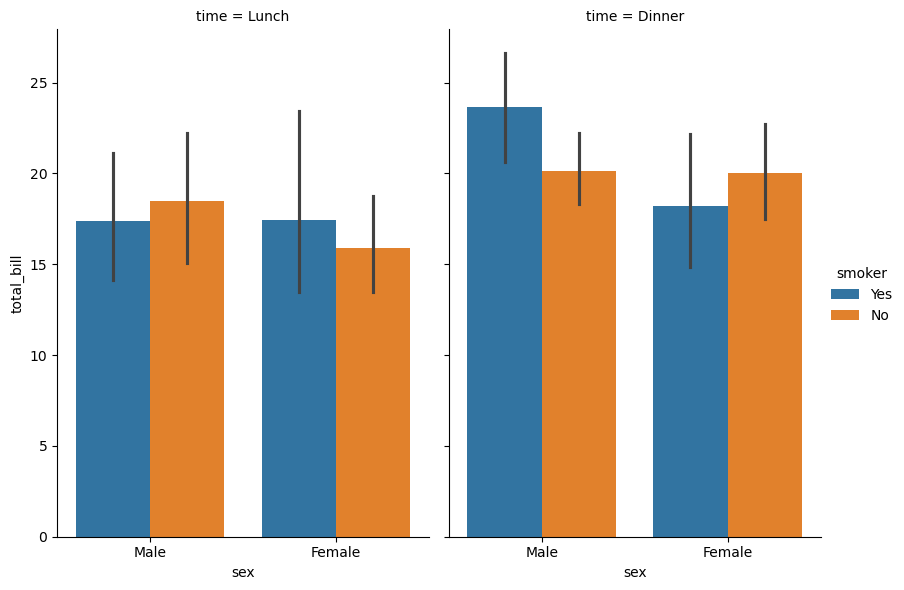

In [89]:
sns.catplot(x="sex", y="total_bill",hue="smoker", col="time",data=tips, kind="bar",height=6, aspect=.7)


**hisplot**

In [94]:
penguins = sns.load_dataset("penguins")


In [95]:
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

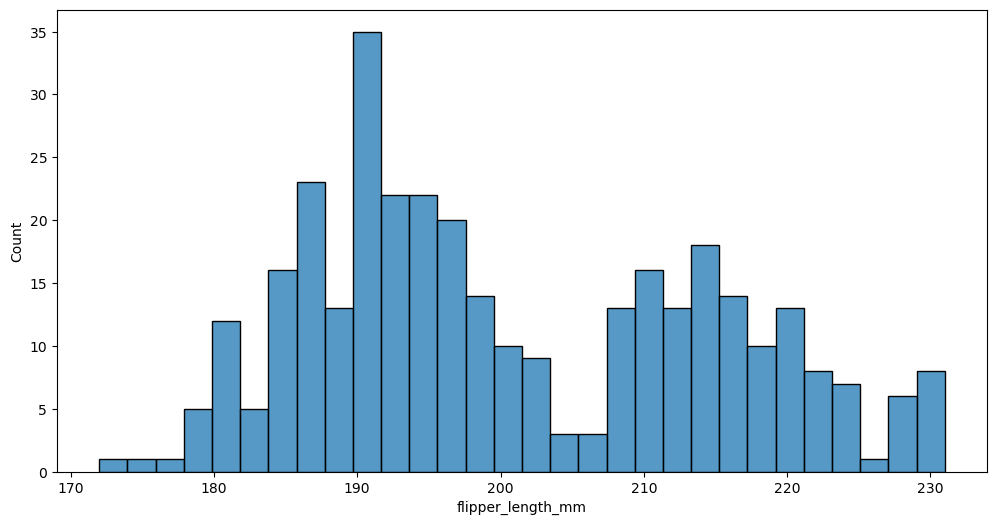

In [90]:

f, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=penguins, x="flipper_length_mm", bins=30)


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

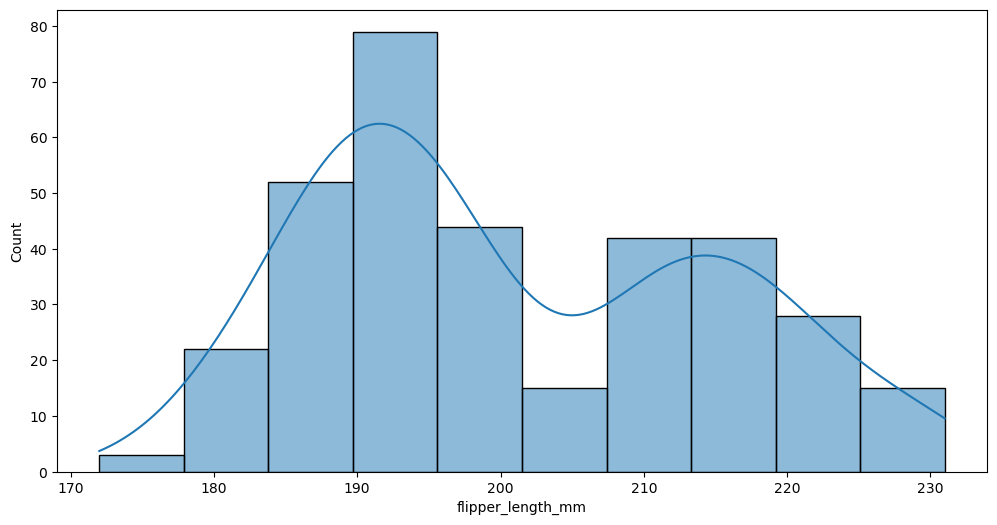

In [91]:
f, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=penguins, x="flipper_length_mm", kde=True)


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

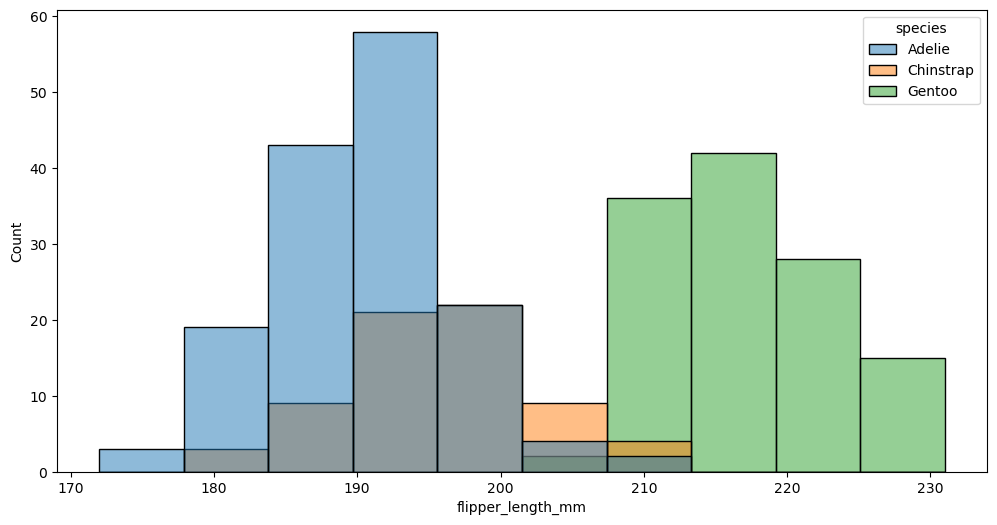

In [92]:
f, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=penguins, x="flipper_length_mm", hue="species")


**pariplot**

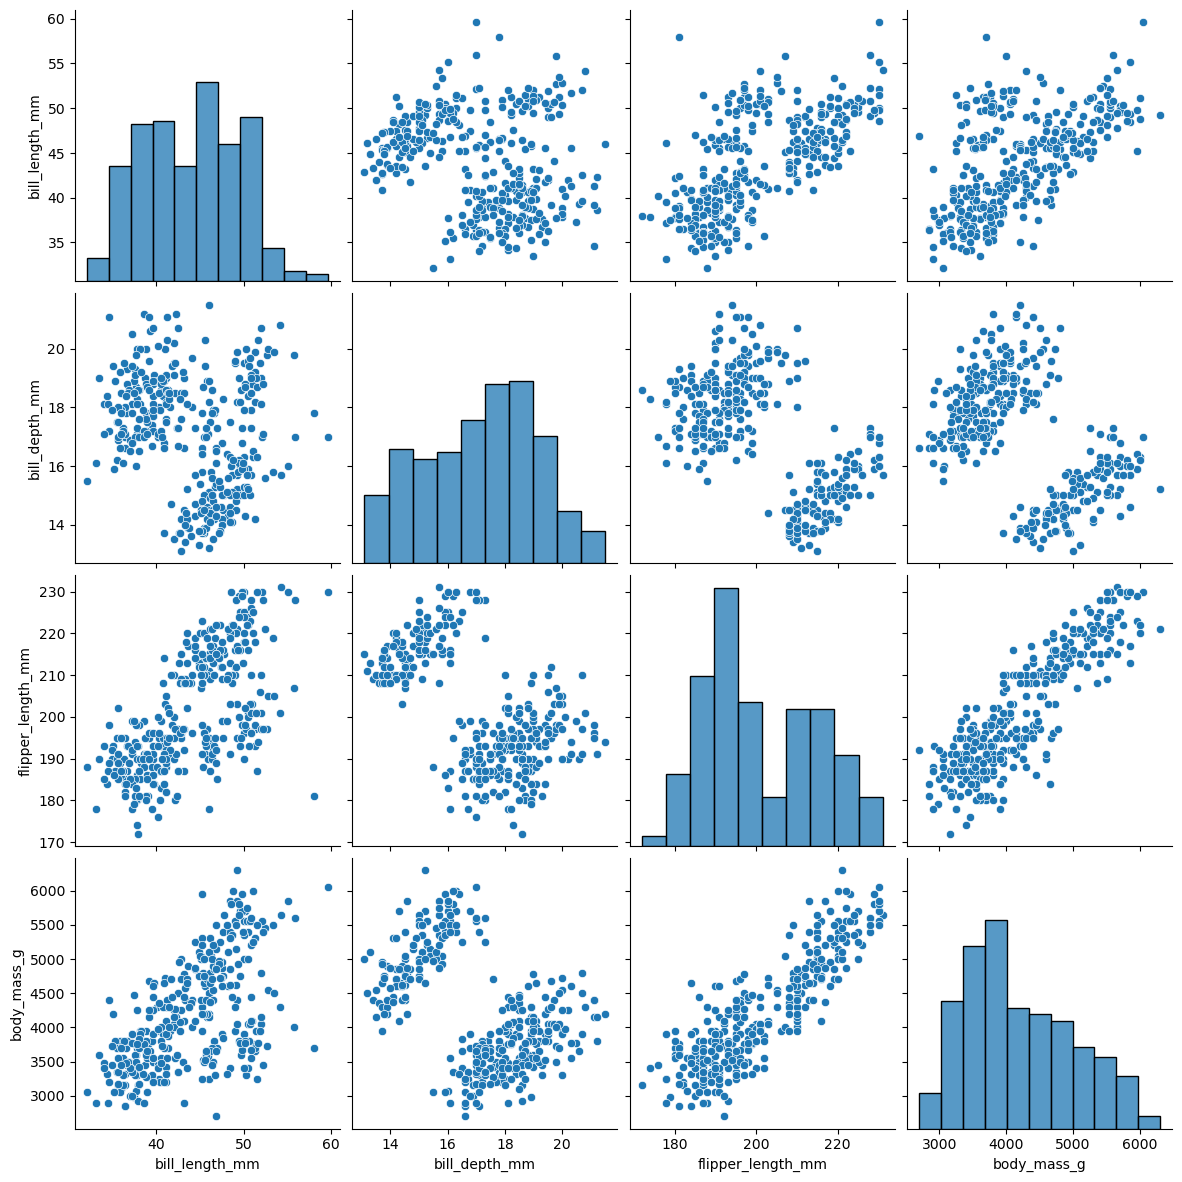

In [93]:
sns.pairplot(penguins,height=3)
